# import data


In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter



%matplotlib inline
train = pd.read_csv('../data/happiness_train_abbr.csv', sep=',')
test = pd.read_csv('../data/happiness_test_abbr.csv', sep=',')
print(train.shape)
print(test.shape)


(150000, 30)
(50000, 30)
train.head()

(8000, 42)
(2968, 41)


,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8


# 删除异常值

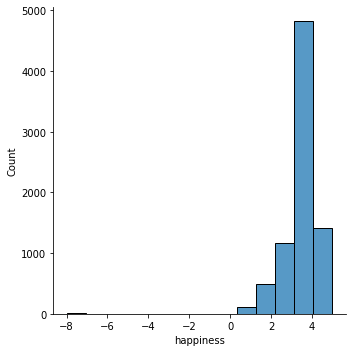

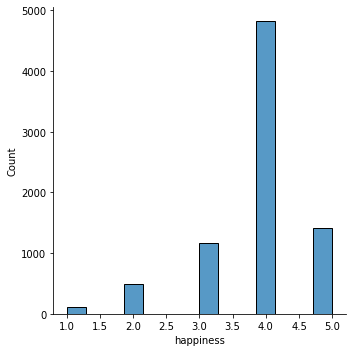

In [29]:
#fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.displot(data=train,x='happiness')
train = train[train['happiness']>=0]
sns.displot(data=train,x='happiness')

# 特征构造

In [30]:
# 训练集和测试集放在一起，方便构造特征
train['train']=1
test['train']=0
data = pd.concat([train, test], ignore_index=True, sort=False)


In [58]:
data.columns

Index(['id', 'happiness', 'survey_type', 'province', 'city', 'county',
       'survey_time', 'gender', 'birth', 'nationality', 'religion',
       'religion_freq', 'edu', 'income', 'political', 'floor_area',
       'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
       'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
       'work_status', 'work_yr', 'work_type', 'work_manage', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'marital', 'status_peer',
       'status_3_before', 'view', 'inc_ability', 'train'],
      dtype='object')

In [59]:
data['survey_time'] = pd.to_datetime(data['survey_time'],format="%Y/%m/%d")

In [57]:
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)
